In [1]:
import pandas as pd

# Load the dataset
file_path = '/Users/user/Desktop/INSY695/group project/Final Preprocessed Data.csv'
data = pd.read_csv(file_path)

# List of columns to remove
columns_to_remove = [
    "ID", "Year_birth", "AcceptedCmp1", "AcceptedCmp2", "AcceptedCmp3", "AcceptedCmp4", "AcceptedCmp5", 
    "Enroll_Year", "Enroll_Month", "Enroll_Day", "Total_amount", "Total_purchase", "Total_Children", 
    "Teenhome", "Kidhome", "R", "F", "M", 
    "RFM_Group_About To Sleep", "RFM_Group_At Risk", "RFM_Group_Hibernating", "RFM_Group_Loyalist", 
    "RFM_Group_Need Attention", "RFM_Group_New Customers", "RFM_Group_Potential Loyalist", 
    "RFM_Group_Promising", "Age_Demographic_Baby Boomer", "Age_Demographic_Gen Z"
]

# Remove the columns from the dataset
data_cleaned = data.drop(columns=columns_to_remove, errors='ignore')



In [2]:
import numpy as np
import skfuzzy as fuzz
from sklearn.preprocessing import StandardScaler

Fuzzy C-Means

In [4]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_cleaned)

In [7]:
data_transposed = data_scaled.T
cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
    data_transposed, c=3, m=2, error=0.005, maxiter=1000, init=None)

# Cluster membership (each point's cluster)
cluster_membership = np.argmax(u, axis=0)

# Outputs
print("Fuzzy Partition Coefficient:", fpc)
print("Cluster Centers:\n", cntr)

Fuzzy Partition Coefficient: 0.33333394400426936
Cluster Centers:
 [[-7.04764449e-04  2.65419090e-03 -2.92763220e-05  2.49719873e-03
   2.02719224e-03  2.37127488e-03  2.11718943e-03  2.02823209e-03
   1.81090880e-03 -2.32151784e-04  1.91153957e-03  2.57222377e-03
   2.48206654e-03 -1.89588013e-03  6.73186924e-05  7.70276153e-04
   3.95905055e-04  7.04764449e-04 -1.87661435e-03 -1.73269856e-03
   1.19423839e-03 -7.72979423e-05 -5.32708252e-05  2.95213043e-05
   2.12059671e-04  3.12900261e-05  2.24185104e-04 -3.65248779e-04
   1.70656942e-04 -3.51808286e-05  2.71935726e-04  2.68642332e-05]
 [-7.37962009e-05  2.72755448e-04 -3.09441455e-06  2.56656519e-04
   2.07216278e-04  2.42327512e-04  2.16311831e-04  2.07277197e-04
   1.86107979e-04 -2.18977996e-05  1.97704343e-04  2.63746026e-04
   2.55514591e-04 -1.94077620e-04  6.94352891e-06  7.90237780e-05
   4.11161909e-05  7.37962009e-05 -1.91360128e-04 -1.77415866e-04
   1.22466772e-04 -7.79683005e-06 -6.53429854e-06  3.78395881e-06
   2.266

In [26]:
# Add the cluster membership to the original dataset
data['Cluster'] = cluster_membership

# Show the first few rows to verify the cluster column has been added
print(data.head())

# Save the new dataframe with the cluster labels
data.to_csv('/Users/user/Desktop/INSY695/group project/Clustered_Data(FCM).csv', index=False) 

     ID  Year_Birth   Income  Kidhome  Teenhome  Recency  MntWines  MntFruits  \
0  5524        1957  58138.0        0         0       58       635         88   
1  2174        1954  46344.0        1         1       38        11          1   
2  4141        1965  71613.0        0         0       26       426         49   
3  6182        1984  26646.0        1         0       26        11          4   
4  5324        1981  58293.0        1         0       94       173         43   

   MntMeatProducts  MntFishProducts  ...  Education_Master  Education_PhD  \
0              546              172  ...               0.0            0.0   
1                6                2  ...               0.0            0.0   
2              127              111  ...               0.0            0.0   
3               20               10  ...               0.0            0.0   
4              118               46  ...               0.0            1.0   

   Marital_Status_Alone  Marital_Status_Divorced  

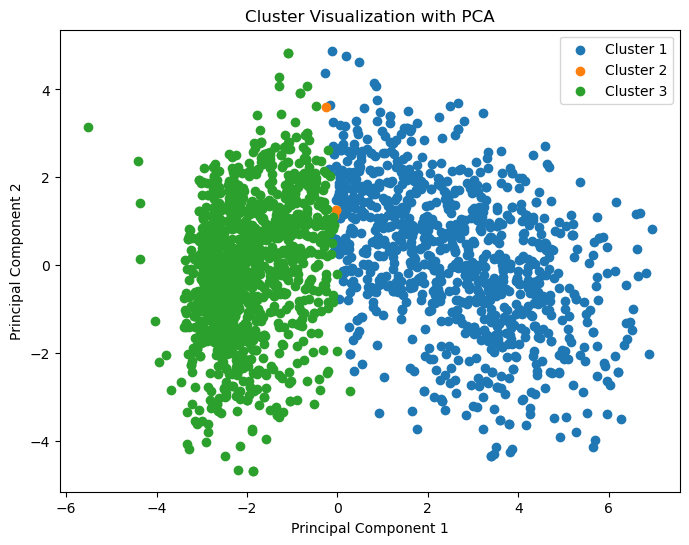

In [8]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Perform PCA to reduce dimensions to 2
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)

# Plotting the results
plt.figure(figsize=(8, 6))
for i in range(3):  # assuming you have 3 clusters from your fuzzy clustering
    plt.scatter(data_pca[u.argmax(axis=0) == i, 0], data_pca[u.argmax(axis=0) == i, 1], label=f'Cluster {i+1}')
plt.title('Cluster Visualization with PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()


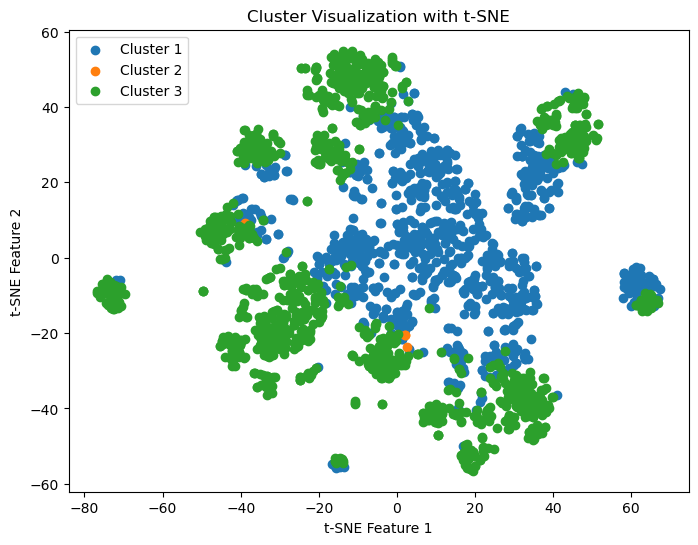

In [9]:
from sklearn.manifold import TSNE

# Perform t-SNE to reduce dimensions to 2
tsne = TSNE(n_components=2, random_state=42)
data_tsne = tsne.fit_transform(data_scaled)

# Plotting the results
plt.figure(figsize=(8, 6))
for i in range(3):  # assuming you have 3 clusters
    plt.scatter(data_tsne[u.argmax(axis=0) == i, 0], data_tsne[u.argmax(axis=0) == i, 1], label=f'Cluster {i+1}')
plt.title('Cluster Visualization with t-SNE')
plt.xlabel('t-SNE Feature 1')
plt.ylabel('t-SNE Feature 2')
plt.legend()
plt.show()


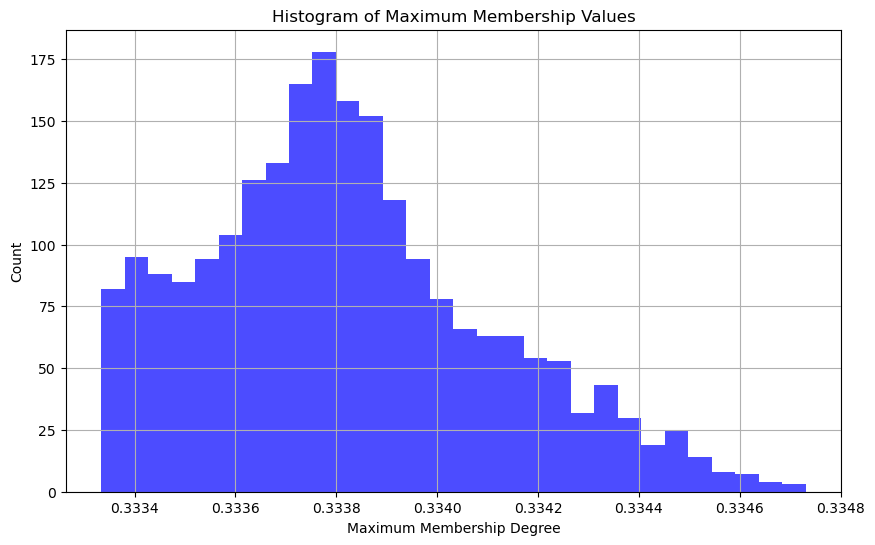

         Cluster 1    Cluster 2    Cluster 3  Max Membership
count  2234.000000  2234.000000  2234.000000     2234.000000
mean      0.333197     0.333319     0.333484        0.333820
std       0.000506     0.000052     0.000558        0.000285
min       0.332068     0.333201     0.332549        0.333334
25%       0.332747     0.333273     0.332923        0.333616
50%       0.333189     0.333319     0.333491        0.333791
75%       0.333705     0.333372     0.333980        0.333988
max       0.334046     0.333406     0.334731        0.334731


In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'u' is your membership matrix from fuzzy clustering
# Each row in 'u' corresponds to a cluster and each column to a data point

# Convert membership matrix to a DataFrame for easier manipulation
membership_df = pd.DataFrame(u.T, columns=[f'Cluster {i+1}' for i in range(u.shape[0])])

# Add maximum membership and its cluster
membership_df['Max Membership'] = membership_df.max(axis=1)
membership_df['Predominant Cluster'] = membership_df.idxmax(axis=1)

# Histogram of maximum membership values to see how many points are strongly associated with a cluster
plt.figure(figsize=(10, 6))
plt.hist(membership_df['Max Membership'], bins=30, alpha=0.7, color='blue')
plt.title('Histogram of Maximum Membership Values')
plt.xlabel('Maximum Membership Degree')
plt.ylabel('Count')
plt.grid(True)
plt.show()

# Display some statistics about the memberships
print(membership_df.describe())


GMM

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture

# Normalize the data
scaler = StandardScaler()
data_normalized = scaler.fit_transform(data_cleaned)

# Apply Gaussian Mixture Model for soft clustering
# We'll choose a number of components based on typical dataset sizes; this can be tuned later
gmm = GaussianMixture(n_components=5, random_state=0)
gmm.fit(data_normalized)

# Predict the probabilities of clusters
cluster_probs = gmm.predict_proba(data_normalized)

# Show the first few rows of cluster probabilities for verification
cluster_probs[:5]

data['Cluster'] = gmm.predict(data_normalized)
data.to_csv('/Users/user/Desktop/INSY695/group project/Clustered_Data(GMM).csv', index=False) 

In [4]:
cluster_probs[:5]

array([[0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 2.47532687e-27,
        0.00000000e+00],
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 5.90122706e-21,
        0.00000000e+00],
       [2.43808498e-60, 1.00000000e+00, 0.00000000e+00, 7.32237367e-21,
        0.00000000e+00],
       [1.00000000e+00, 9.41736154e-11, 0.00000000e+00, 2.63814834e-22,
        0.00000000e+00],
       [1.61468426e-14, 1.00000000e+00, 0.00000000e+00, 1.81387293e-12,
        0.00000000e+00]])

In [11]:
# Retrieve the centroids (means of the Gaussian distributions for each cluster)
centroids = gmm.means_

# Transform centroids back to original scale
centroids_original_scale = scaler.inverse_transform(centroids)

# Create a DataFrame to display centroids for each cluster for easier interpretation
centroids_df = pd.DataFrame(centroids_original_scale, columns=data_cleaned.columns)
centroids_df


,Year_Birth,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,...,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO
0,1970.474509,37416.993470,48.498819,70.222625,4.060055,26.738532,6.089574,4.194186,15.128956,2.308530,...,0.501590,0.184630,0.214351,2.168404e-19,0.000000e+00,0.447687,2.363502e-01,2.933741e-01,2.258874e-02,0.000000e+00
1,1967.485094,67263.878107,49.916709,543.814477,48.995421,314.770068,70.953126,50.536359,71.336571,2.002353,...,0.525873,0.156764,0.232627,2.168404e-19,1.387779e-17,0.412779,2.418613e-01,2.871494e-01,5.605537e-02,-2.168404e-19
2,1976.441176,23244.514688,46.970588,20.573529,9.308824,14.705882,14.132353,10.544118,23.367647,1.970588,...,0.117647,0.014706,0.044118,2.168404e-19,2.941176e-02,0.367647,3.235294e-01,2.352941e-01,1.470588e-02,2.941176e-02
3,1966.924397,60300.278045,48.500229,416.047384,31.373851,237.111597,41.750502,35.340164,72.432246,6.111785,...,0.575133,0.187483,0.162438,3.747274e-02,-1.249001e-16,0.487935,1.623525e-01,2.747666e-01,3.747273e-02,-7.589415e-19
4,1966.589520,53227.467249,49.432314,328.960699,27.755459,152.117904,35.427948,27.126638,46.737991,2.445415,...,0.515284,0.161572,0.227074,-1.084202e-18,1.000000e+00,0.000000,-2.775558e-17,-5.551115e-17,1.387779e-17,1.084202e-19


In [12]:

# Get the overall mean of the features for comparison
overall_mean = data_cleaned.mean()

# Print out the features characterizing each cluster
for i, centroid in centroids_df.iterrows():
    print(f"Cluster {i} characteristics:")
    above_mean_features = centroid > overall_mean
    below_mean_features = centroid < overall_mean
    
    # Features where the cluster centroid is above the overall mean
    print("Features with high mean values:")
    print(centroid[above_mean_features].sort_values(ascending=False))
    
    # Features where the cluster centroid is below the overall mean
    print("\nFeatures with low mean values:")
    print(centroid[below_mean_features].sort_values())
    
    print("\n" + "-"*80 + "\n")


Cluster 0 characteristics:
Features with high mean values:
Year_Birth                 1970.474509
NumWebVisitsMonth             6.398522
Family_Size                   3.074862
Is_Parent                     0.917297
Marital_Status_Married        0.447687
Marital_Status_Together       0.293374
Marital_Status_Single         0.236350
Education_Master              0.184630
Name: 0, dtype: float64

Features with low mean values:
Marital_Status_YOLO        0.000000e+00
Marital_Status_Divorced    0.000000e+00
Complain                   0.000000e+00
Marital_Status_Alone       2.168404e-19
Education_Basic            6.938894e-18
Marital_Status_Widow       2.258874e-02
Cmp_Attitude               9.105976e-02
Response                   9.789564e-02
Education_PhD              2.143509e-01
Education_Graduation       5.015897e-01
NumCatalogPurchases        6.540808e-01
NumDealsPurchases          2.308530e+00
NumWebPurchases            2.457679e+00
Member_Year                2.852835e+00
NumStorePurch

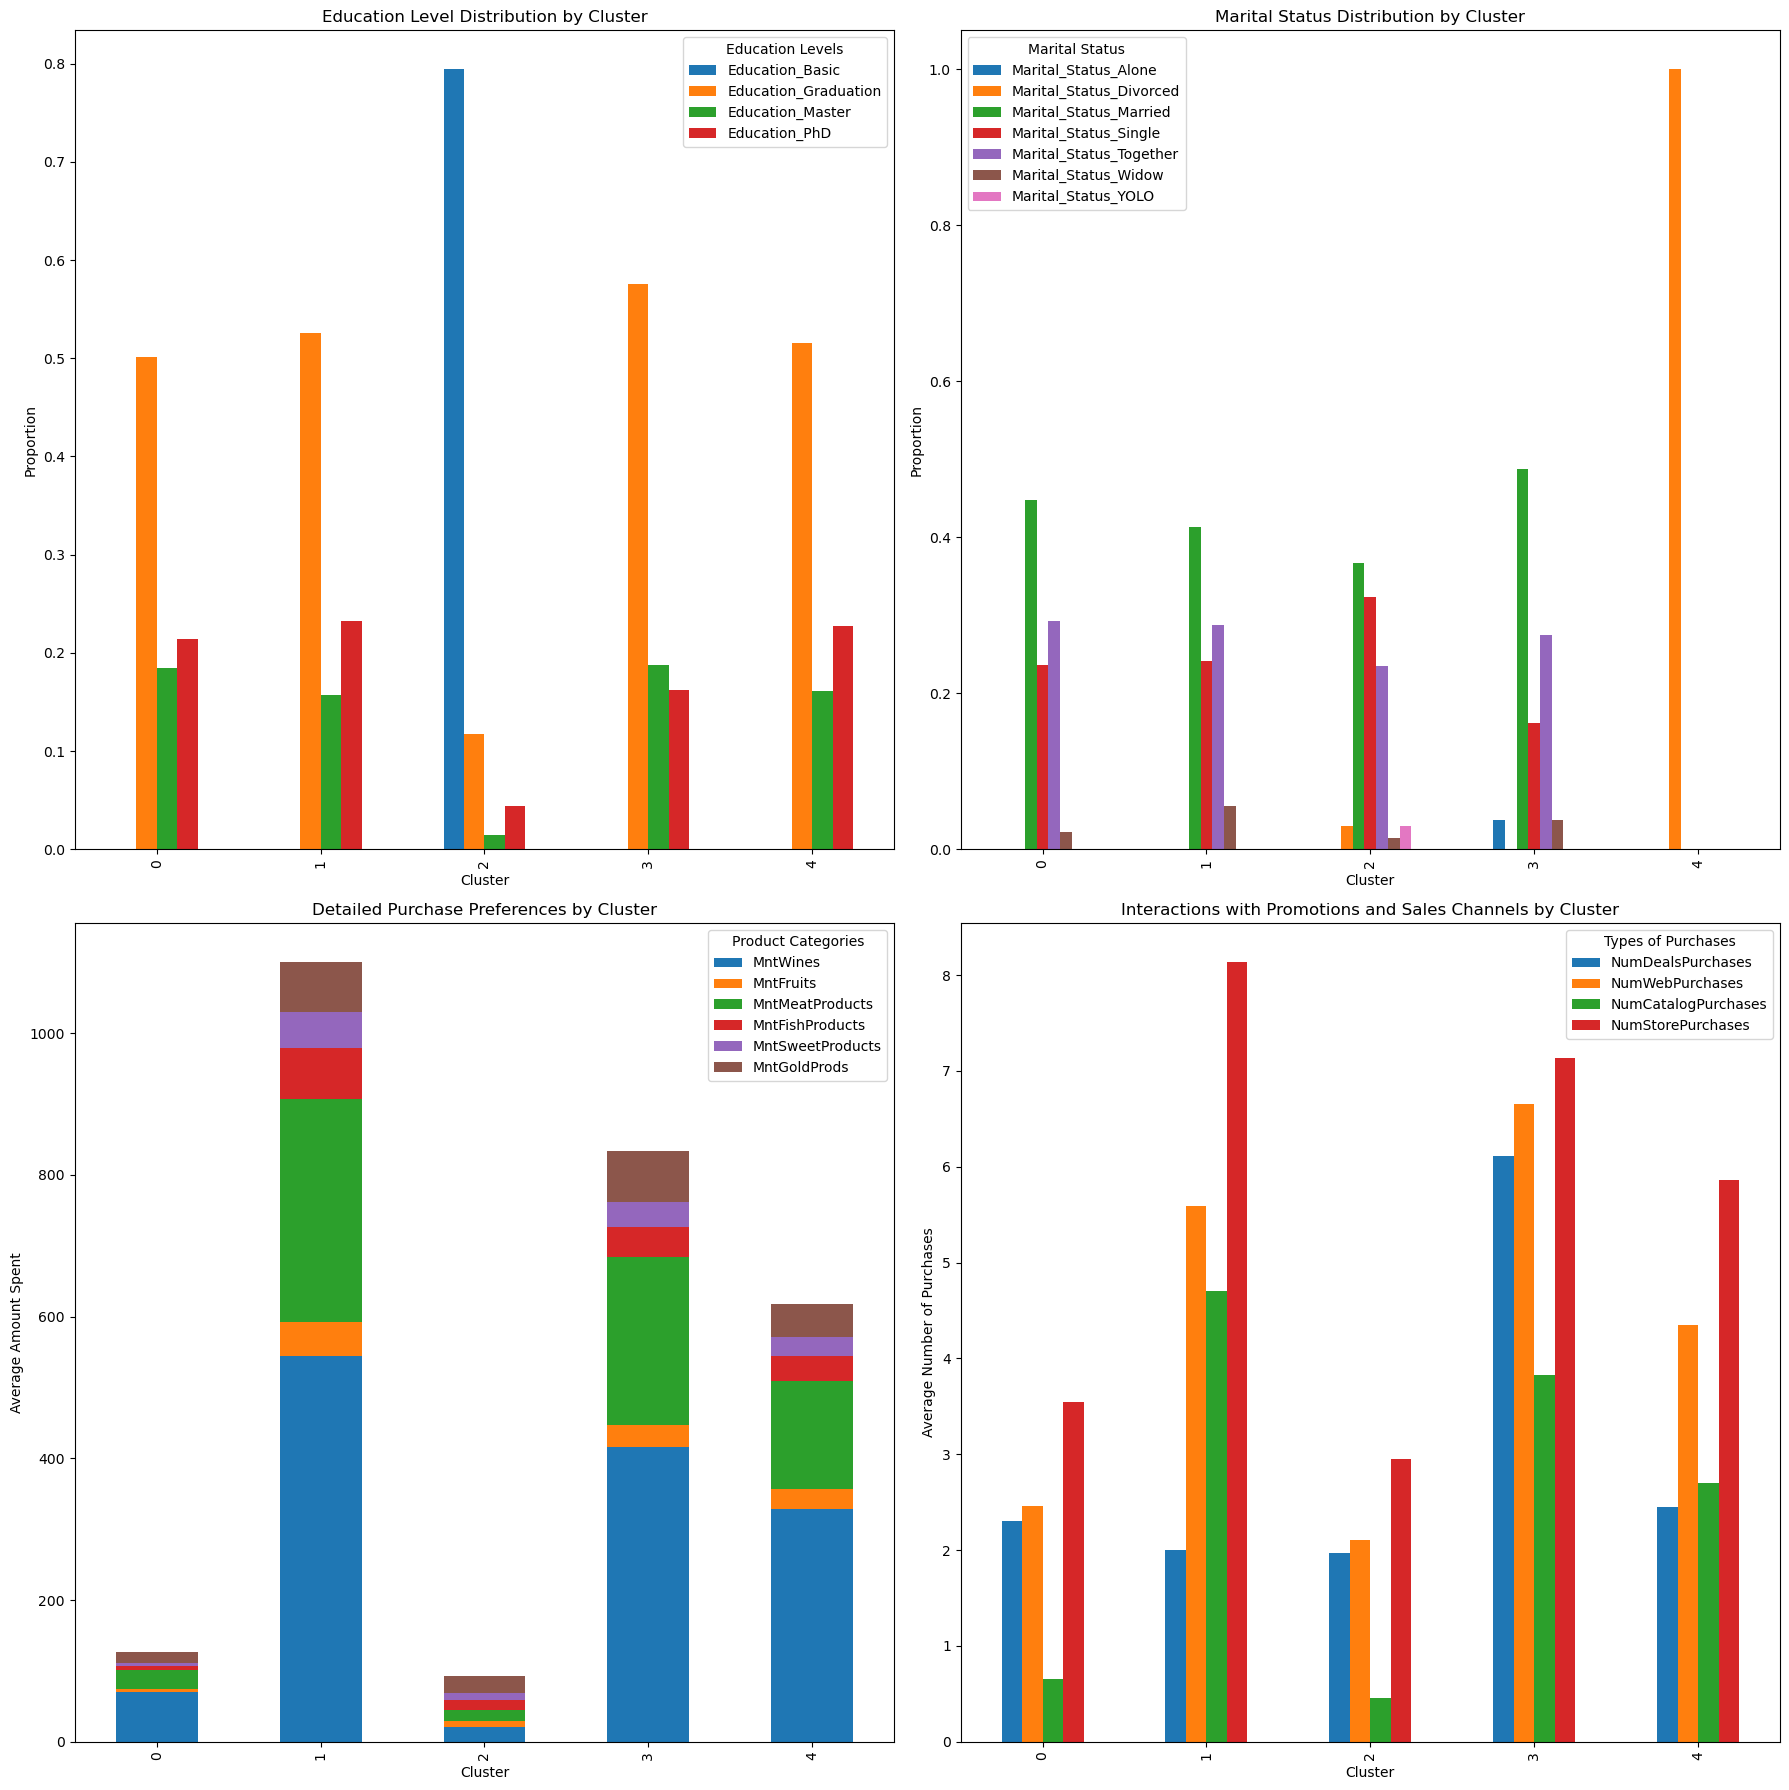

In [22]:
# Create a figure with subplots for Demographic Profiles and Purchase Preferences
fig, axes = plt.subplots(2, 2, figsize=(18, 18), dpi=100)


education_columns = ['Education_Basic', 'Education_Graduation', 'Education_Master', 'Education_PhD']
marital_status_columns = ['Marital_Status_Alone', 'Marital_Status_Divorced', 'Marital_Status_Married', 
                          'Marital_Status_Single', 'Marital_Status_Together', 'Marital_Status_Widow', 'Marital_Status_YOLO']
product_columns = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
purchase_columns = ['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']

# Plot for Education Levels by Cluster
centroids_df[education_columns].plot(kind='bar', ax=axes[0, 0])
axes[0, 0].set_title('Education Level Distribution by Cluster')
axes[0, 0].set_xlabel('Cluster')
axes[0, 0].set_ylabel('Proportion')
axes[0, 0].legend(title='Education Levels')

# Plot for Marital Status by Cluster
centroids_df[marital_status_columns].plot(kind='bar', ax=axes[0, 1])
axes[0, 1].set_title('Marital Status Distribution by Cluster')
axes[0, 1].set_xlabel('Cluster')
axes[0, 1].set_ylabel('Proportion')
axes[0, 1].legend(title='Marital Status')

# Detailed Purchase Preferences by Cluster
# Reusing 'product_columns' from previous definition for Plot 2
centroids_df[product_columns].plot(kind='bar', stacked=True, ax=axes[1, 0])
axes[1, 0].set_title('Detailed Purchase Preferences by Cluster')
axes[1, 0].set_xlabel('Cluster')
axes[1, 0].set_ylabel('Average Amount Spent')
axes[1, 0].legend(title='Product Categories')

# Interaction with Promotions and Sales Channels
# Reusing 'purchase_columns' from previous definition for Plot 3
centroids_df[purchase_columns].plot(kind='bar', ax=axes[1, 1])
axes[1, 1].set_title('Interactions with Promotions and Sales Channels by Cluster')
axes[1, 1].set_xlabel('Cluster')
axes[1, 1].set_ylabel('Average Number of Purchases')
axes[1, 1].legend(title='Types of Purchases')

# Adjust layout and show plot
plt.tight_layout()
plt.show()


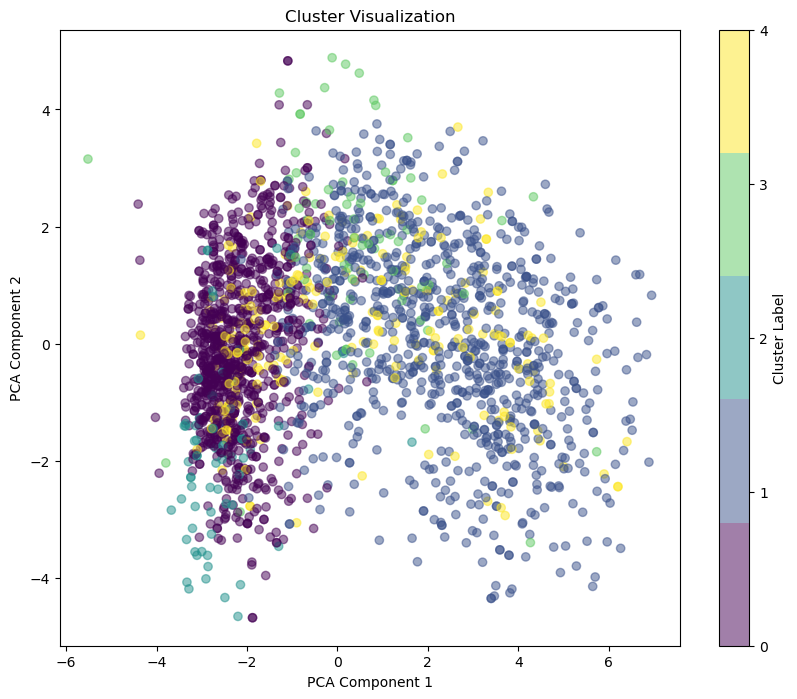

In [9]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from matplotlib.colors import ListedColormap

# Assuming 'data_normalized' and 'clusters' are already defined
# Fit PCA to reduce dimensions to 2 for visualization
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_normalized)

# Create a color map with discrete colors for each cluster
cmap = ListedColormap(plt.cm.viridis(np.linspace(0, 1, 5)))

# Plotting the results with distinct colors
plt.figure(figsize=(10, 8))
scatter = plt.scatter(data_pca[:, 0], data_pca[:, 1], c=clusters, cmap=cmap, alpha=0.5)
plt.title('Cluster Visualization')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(scatter, ticks=np.arange(0, 5), label='Cluster Label')
plt.show()
